Enter the number of stocks between 1-10: 3
**************************************************
Choose stock number 1 of the following stocks. 
['FB', 'AAPL', 'AMZN', 'IBM', 'GOOG', 'MSFT', 'F', 'O', 'QCOM', 'TSLA']
**************************************************
Enter your stock: AAPL
**************************************************
Choose stock number 2 of the following stocks. 
['FB', 'AAPL', 'AMZN', 'IBM', 'GOOG', 'MSFT', 'F', 'O', 'QCOM', 'TSLA']
**************************************************
Enter your stock: O
**************************************************
Choose stock number 3 of the following stocks. 
['FB', 'AAPL', 'AMZN', 'IBM', 'GOOG', 'MSFT', 'F', 'O', 'QCOM', 'TSLA']
**************************************************
Enter your stock: F
Please enter the Moving Window range: 14
Please enter a start date for the chart between 2010-01-01 and 2017-12-31 , in the format YYYY-MM-DD, here: 2011-01-01
Please enter a finish date for the chart between 2010-01-01 and 2017

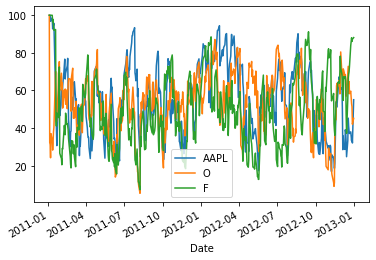

In [6]:
import pandas
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import yfinance as yf

no_of_stocks = input("Enter the number of stocks between 1-10: ")
n=1
user_stock_list = []
stock_list = ["FB","AAPL","AMZN","IBM","GOOG","MSFT","F","O","QCOM","TSLA"]


while n <= int(no_of_stocks):
    print("*" * 50)
    print(f"Choose stock number {n} of the following stocks. \n{stock_list}")
    print("*" * 50)
    stock = input("Enter your stock: ")
    if stock in stock_list:
        user_stock_list.append(stock)
        n+=1
    else:
        print('Stock is not in list. Please try again.')

# Window length for moving average
window_length = input("Please enter the Moving Window range: ")

# Dates
start_date = input("Please enter a start date for the chart between 2010-01-01 and 2017-12-31 , in the format YYYY-MM-DD, here: ")
finish_date = input("Please enter a finish date for the chart between 2010-01-01 and 2017-12-31 , in the format YYYY-MM-DD, here: ")

# Methods
method = ""
while method == "":
    method = input("Please whether you would like to use the EWMA or SMA to compute the Relative Strength Index value: ")
    if method.lower() != 'ewma' and method.lower() !='sma':
        print (" Invalid Input. Please try again.")
        method = ""
    

for stock in user_stock_list:
    # Get data
    data = web.DataReader(stock, 'yahoo', start_date, finish_date)
    # Get just the adjusted close price
    close = data['Adj Close']
    # Get the difference in price from previous step
    delta = close.diff()
    # Get rid of the first row, which is NaN since it did not have a previous 
    # row to calculate the differences
    delta = delta[1:] 

    # Make the positive gains (up) and negative gains (down) Series
    up = delta.clip(lower=0)
    down = delta.clip(upper=0)

    if method.lower() == "ewma":
        # EWMA method
        # Calculate the EWMA
        roll_up1 = up.ewm(span=int(window_length)).mean()
        roll_down1 = down.abs().ewm(span=int(window_length)).mean()
        # Calculate the RSI based on EWMA
        RS_ewma = roll_up1 / roll_down1
        RSI_ewma = 100.0 - (100.0 / (1.0 + RS_ewma))
        RSI_ewma.plot()

    elif method.lower() == "sma":
        # SMA method
        # Calculate the SMA
        roll_up2 = up.rolling(int(window_length)).mean()
        roll_down2 = down.abs().rolling(int(window_length)).mean()
        # Calculate the RSI based on SMA
        RS_sma = roll_up2 / roll_down2
        RSI_sma = 100.0 - (100.0 / (1.0 + RS_sma))
        RSI_sma.plot()

plt.legend(user_stock_list)
plt.show()